In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sns.set(style="darkgrid")

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
print("Colunas:", df.columns.tolist())

Colunas: ['location', 'date', 'total_deaths', 'population', 'deaths_per_million']


In [ ]:
df_brasil = df[df["location"] == "Brazil"]


In [ ]:
df_brasil.loc[:, "date"] = pd.to_datetime(df_brasil["date"])



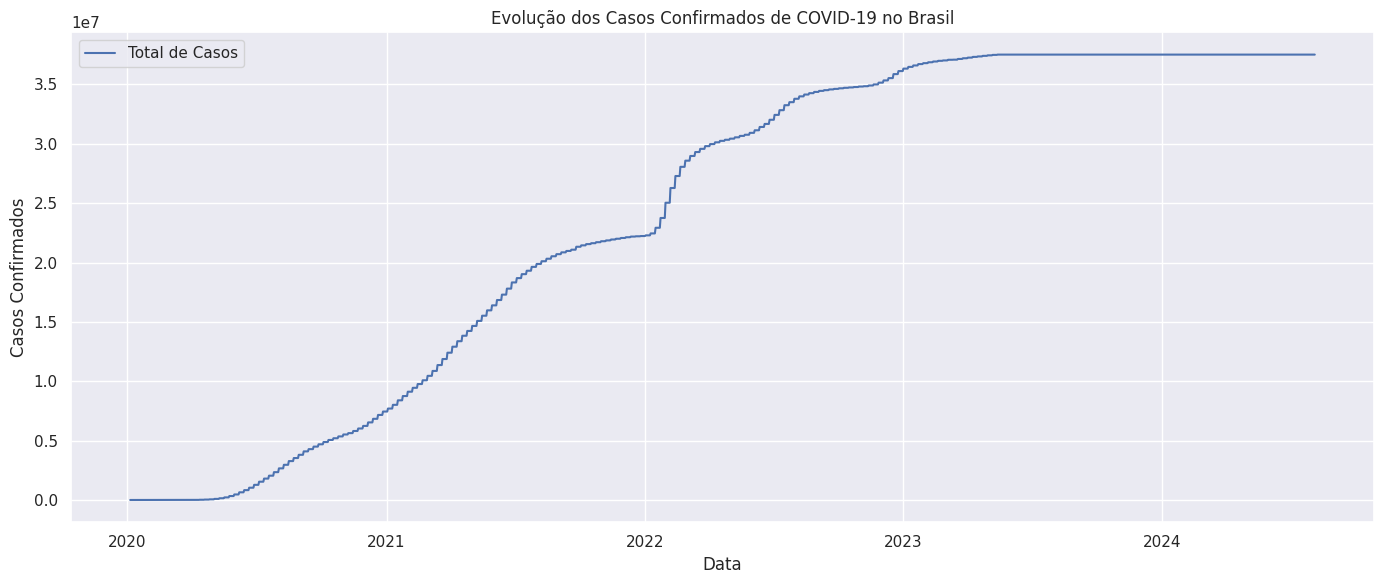

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df_brasil["date"], df_brasil["total_cases"], label="Total de Casos")
plt.title("Evolução dos Casos Confirmados de COVID-19 no Brasil")
plt.xlabel("Data")
plt.ylabel("Casos Confirmados")
plt.legend()
plt.tight_layout()
plt.show()

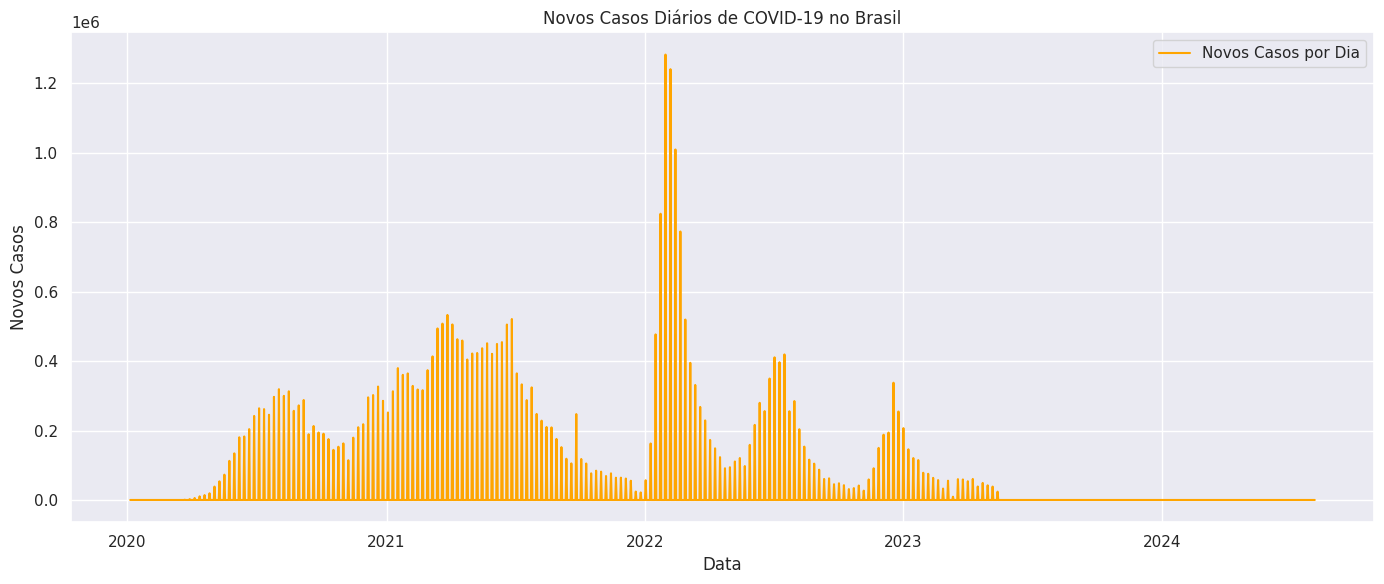

In [ ]:
df_brasil.loc[:, "new_cases"] = df_brasil["new_cases"].fillna(0)

plt.figure(figsize=(14, 6))
plt.plot(df_brasil["date"], df_brasil["new_cases"], label="Novos Casos por Dia", color="orange")
plt.title("Novos Casos Diários de COVID-19 no Brasil")
plt.xlabel("Data")
plt.ylabel("Novos Casos")
plt.legend()
plt.tight_layout()
plt.show()


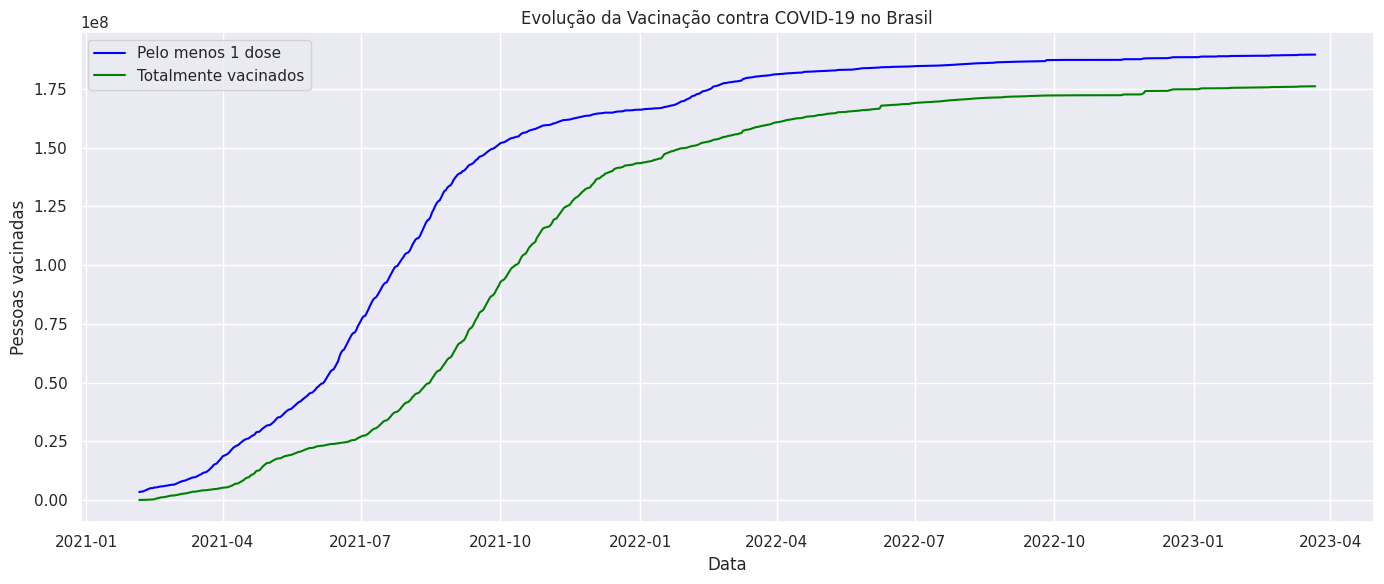

In [ ]:
df_vac = df_brasil[(df_brasil["people_vaccinated"] > 0) & (df_brasil["people_fully_vaccinated"] > 0)]

plt.figure(figsize=(14, 6))
plt.plot(df_vac["date"], df_vac["people_vaccinated"], label="Pelo menos 1 dose", color="blue")
plt.plot(df_vac["date"], df_vac["people_fully_vaccinated"], label="Totalmente vacinados", color="green")
plt.title("Evolução da Vacinação contra COVID-19 no Brasil")
plt.xlabel("Data")
plt.ylabel("Pessoas vacinadas")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv(url, parse_dates=['date'])

In [ ]:
brasil = df[df['location'] == 'Brazil'][['date', 'total_deaths']].dropna()
eua = df[df['location'] == 'United States'][['date', 'total_deaths']].dropna()


In [ ]:
brasil = brasil.sort_values('date')
eua = eua.sort_values('date')


In [ ]:
df_merged = pd.merge(brasil, eua, on='date', suffixes=('_br', '_eua'))

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

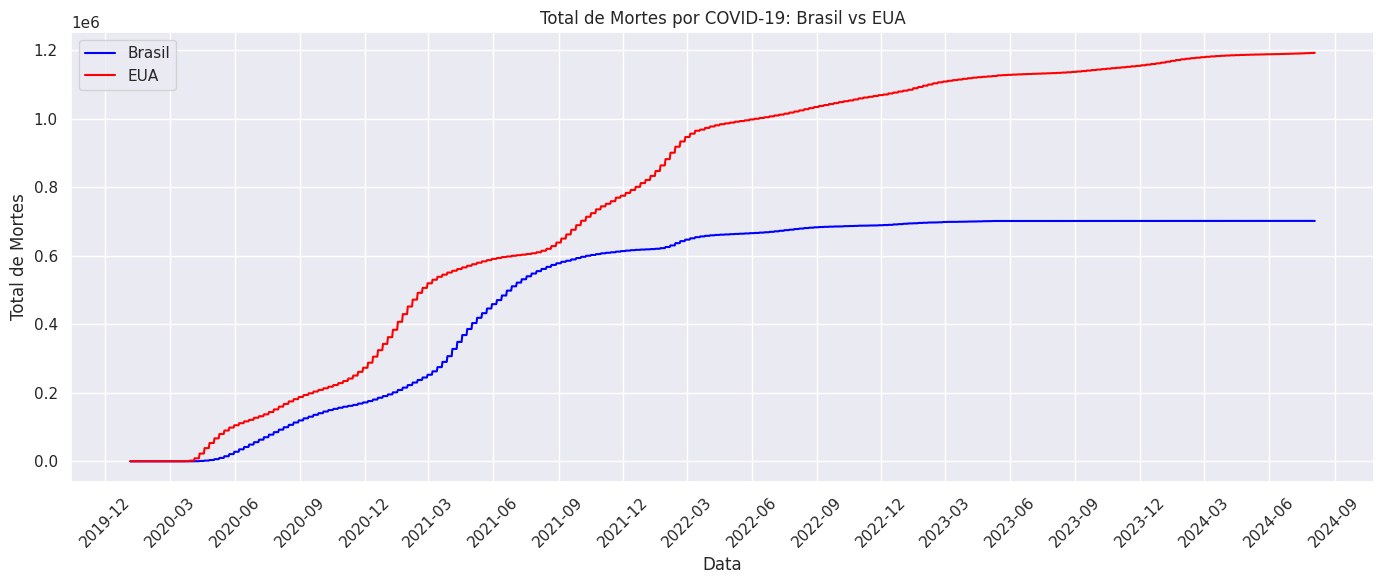

In [86]:
plt.figure(figsize=(14, 6))
plt.plot(df_merged['date'], df_merged['total_deaths_br'], label='Brasil', color='blue')
plt.plot(df_merged['date'], df_merged['total_deaths_eua'], label='EUA', color='red')
plt.title('Total de Mortes por COVID-19: Brasil vs EUA')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [ ]:
df = df[['location', 'date', 'total_deaths', 'population']]


In [ ]:
df = df[df['location'].isin(['Brazil', 'United States'])].copy()


In [ ]:
df = df.groupby(['location', 'date'], as_index=False).last()


In [ ]:
df = df.dropna(subset=['total_deaths', 'population'])


In [ ]:
df['deaths_per_million'] = df['total_deaths'] / (df['population'] / 1_000_000)


In [ ]:
df_pivot = df.pivot(index='date', columns='location', values='deaths_per_million')


In [ ]:
df = df.groupby(['location', 'date'], as_index=False).last()


In [ ]:
df_pivot = df.pivot(index='date', columns='location', values='deaths_per_million')


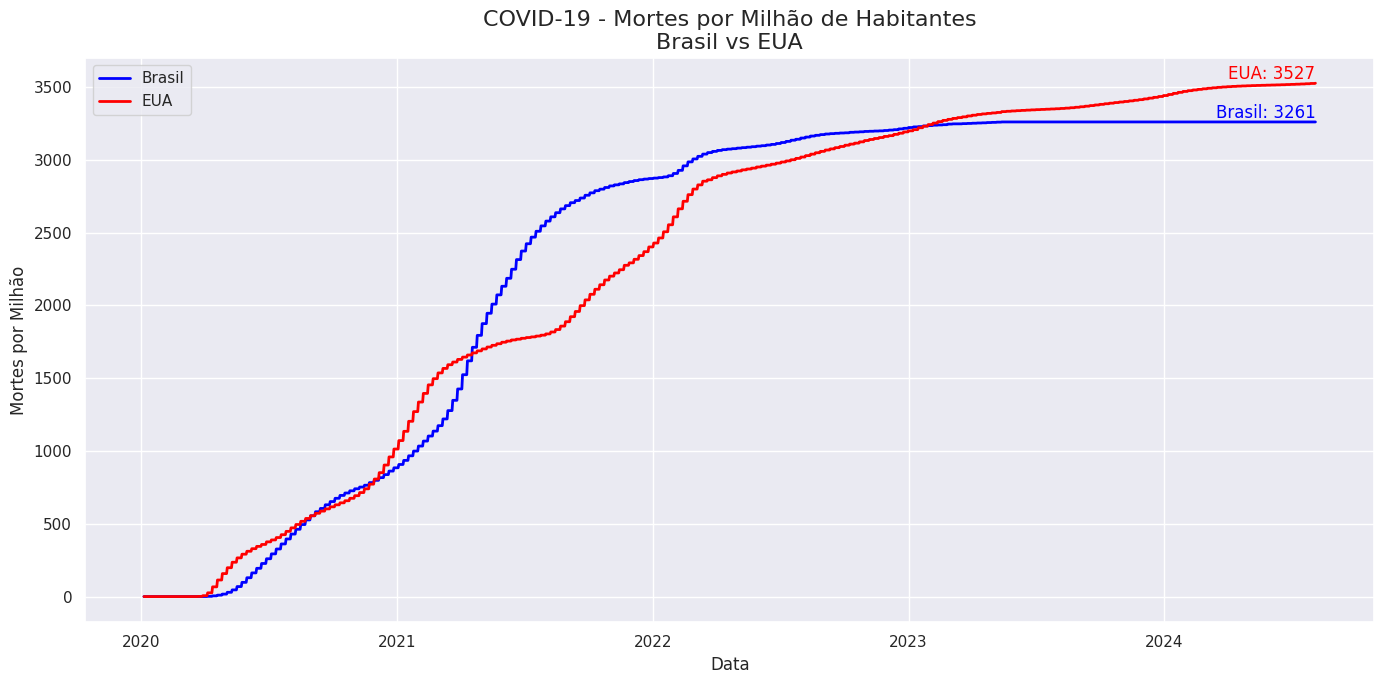

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_pivot.index, df_pivot['Brazil'], label='Brasil', color='blue', linewidth=2)
plt.plot(df_pivot.index, df_pivot['United States'], label='EUA', color='red', linewidth=2)

# Marcar o último ponto
br_ultimo = df_pivot['Brazil'].dropna().iloc[-1]
us_ultimo = df_pivot['United States'].dropna().iloc[-1]
data_final = df_pivot.index[-1]

plt.text(data_final, br_ultimo, f'Brasil: {br_ultimo:.0f}', color='blue', va='bottom', ha='right')
plt.text(data_final, us_ultimo, f'EUA: {us_ultimo:.0f}', color='red', va='bottom', ha='right')

# Infos do gráfico
plt.title('COVID-19 - Mortes por Milhão de Habitantes\nBrasil vs EUA', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Mortes por Milhão')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
us = df[df['location'] == 'United States'].dropna(subset=['deaths_per_million']).sort_values('date')
br = df[df['location'] == 'Brazil'].dropna(subset=['deaths_per_million']).sort_values('date')

print("EUA:", round(us['deaths_per_million'].iloc[-1], 2))
print("Brasil:", round(br['deaths_per_million'].iloc[-1], 2))

EUA: 3527.05
Brasil: 3260.9


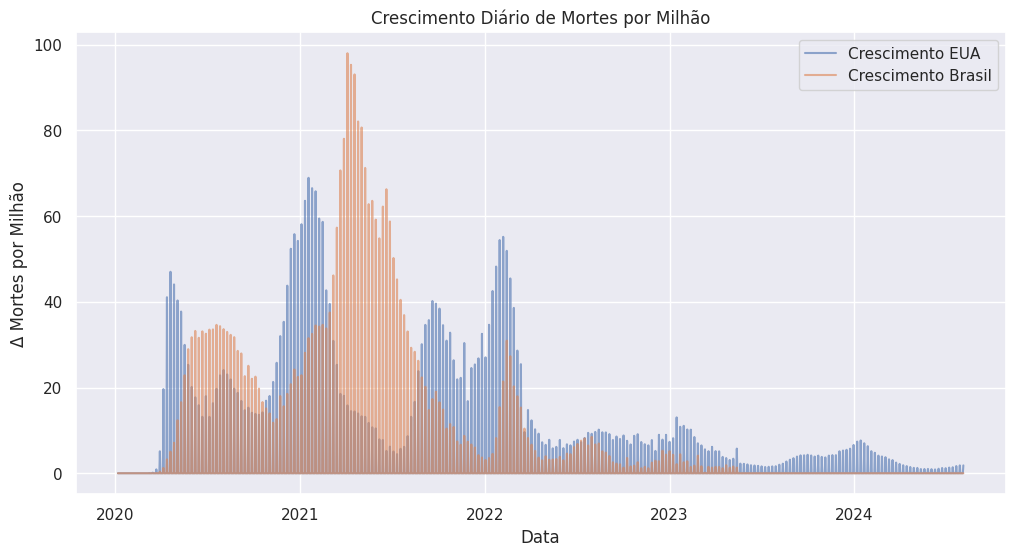

In [80]:
us['growth'] = us['deaths_per_million'].diff()
br['growth'] = br['deaths_per_million'].diff()

# Plotar o crescimento diário
plt.figure(figsize=(12, 6))
plt.plot(us['date'], us['growth'], label='Crescimento EUA', alpha=0.6)
plt.plot(br['date'], br['growth'], label='Crescimento Brasil', alpha=0.6)
plt.title('Crescimento Diário de Mortes por Milhão')
plt.xlabel('Data')
plt.ylabel('Δ Mortes por Milhão')
plt.legend()
plt.grid(True)
plt.show()
